# R12: Japanese Grand Prix


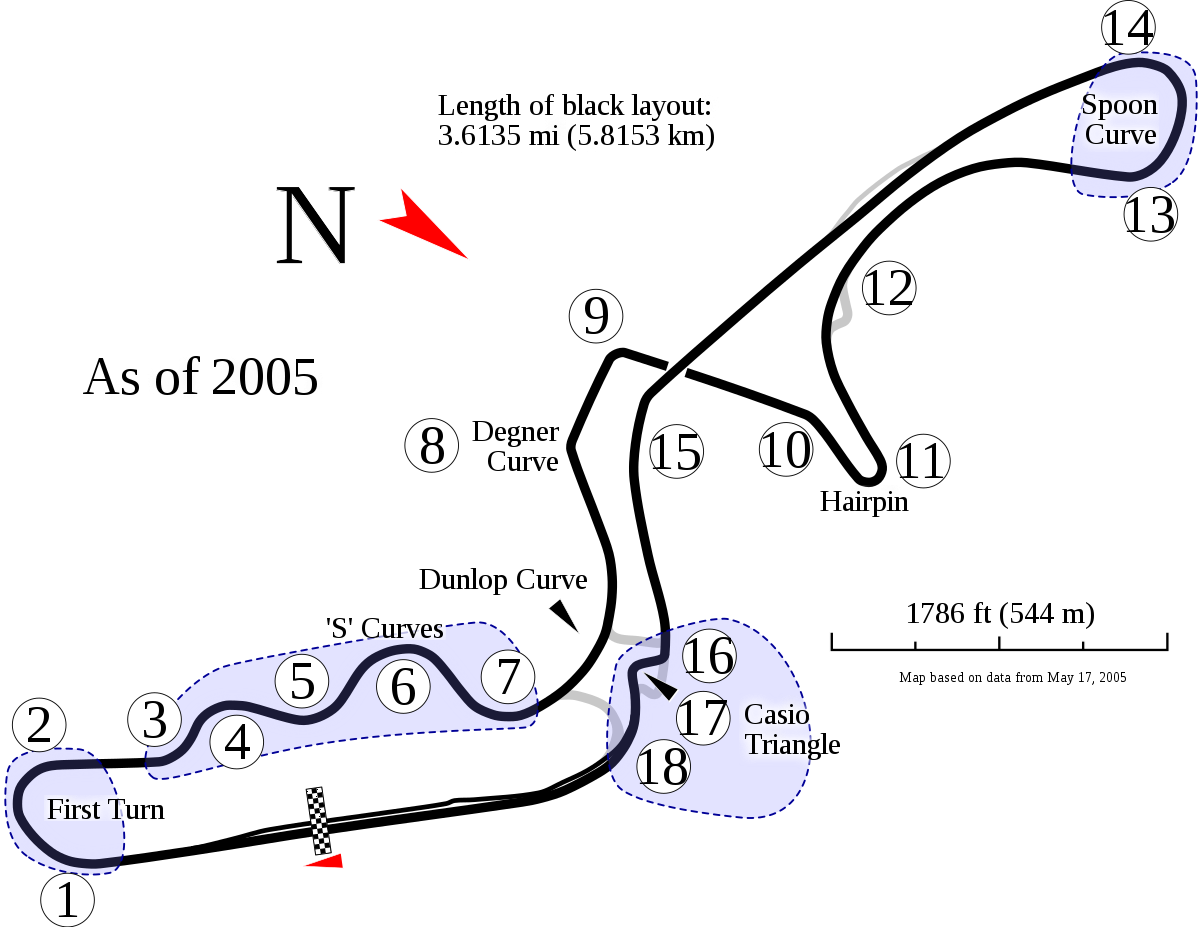

In [117]:
import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils

from matplotlib.collections import LineCollection
from matplotlib import cm
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

In [3]:
plotting.setup_mpl()
ff1.Cache.enable_cache('cache')

In [26]:
quali = ff1.get_session(2022, 12, 'Q')

In [28]:
laps = quali.load_laps(with_telemetry=True)

core           INFO 	Loading laps for French Grand Prix - Qualifying [v2.1.13]
api            INFO 	No cached data found for timing_data. Loading data...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_app_data. Loading data...
api            INFO 	Fetching timing app data...
api            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
api            INFO 	No cached data found for driver_info. Loading data...
api            INFO 	Fetching driver list...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for session_status_data. Loading data...
api            INFO 	Fetching session status data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for track_status_data. Loading data...
api            INFO 	Fetching tra

## Qualifying

In quali, Max took pole over Charles by 0.010s and over Carlos by 0.057s. It was very close and it is said to be the 4th closest gap on qualifying (ever?).

In [42]:
ver = laps.pick_driver('VER')
lec = laps.pick_driver('LEC')

fastest_ver = ver.pick_fastest()
fastest_lec = lec.pick_fastest()

In [22]:
telemetry_ver = fastest_ver.get_car_data().add_distance()
telemetry_lec = fastest_lec.get_car_data().add_distance()

In [30]:
# Getting the delta time
delta_time, ref_tel, compare_tel = utils.delta_time(fastest_ver, fastest_lec)

[Text(0, 0.5, '<-- VER AHEAD | LEC AHEAD -->')]

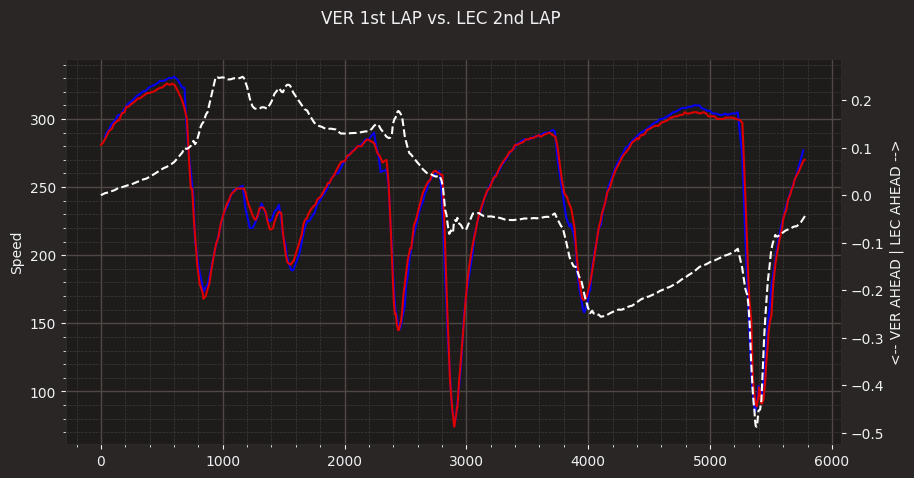

In [53]:
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle("VER 1st LAP vs. LEC 2nd LAP")

ax.plot(telemetry_ver['Distance'], telemetry_ver['Speed'], label='VER', color=plotting.team_color(fastest_ver['Team']))
ax.plot(telemetry_lec['Distance'], telemetry_lec['Speed'], label='LEC', color=plotting.team_color(fastest_lec['Team']))
ax.set(ylabel='Speed')

twin = ax.twinx()
twin.plot(ref_tel['Distance'], delta_time, '--', color='white')
twin.set(ylabel='<-- VER AHEAD | LEC AHEAD -->')

To give some context, *Max's fastest lap was on his first run* whilst *Leclerc's fastest was on his second*. Max could not improve on his second due to mistake (+0.028s on 2nd run) which ultimately is irrelevant as Leclerc couldn't beat Max's first lap.

As we could see from the telemetry above, 
- Max's top speed is higher than Charles'
- Charles was actually faster 0.2s+ over Max at some point. But half of the lap is where his advantage started to shrink.
- Charles time loss starts around Degner Two (T9). He lost a spike on hairpin (T11). And lost a spike more on Spoon Curve entry (T13).
- On spoon curve exit (T14) and through 130R (T15) he gained back some time albeit *perhaps* gave the time back on Casio Triangle entry (T16). He later commented that the grip are already gone by that point.

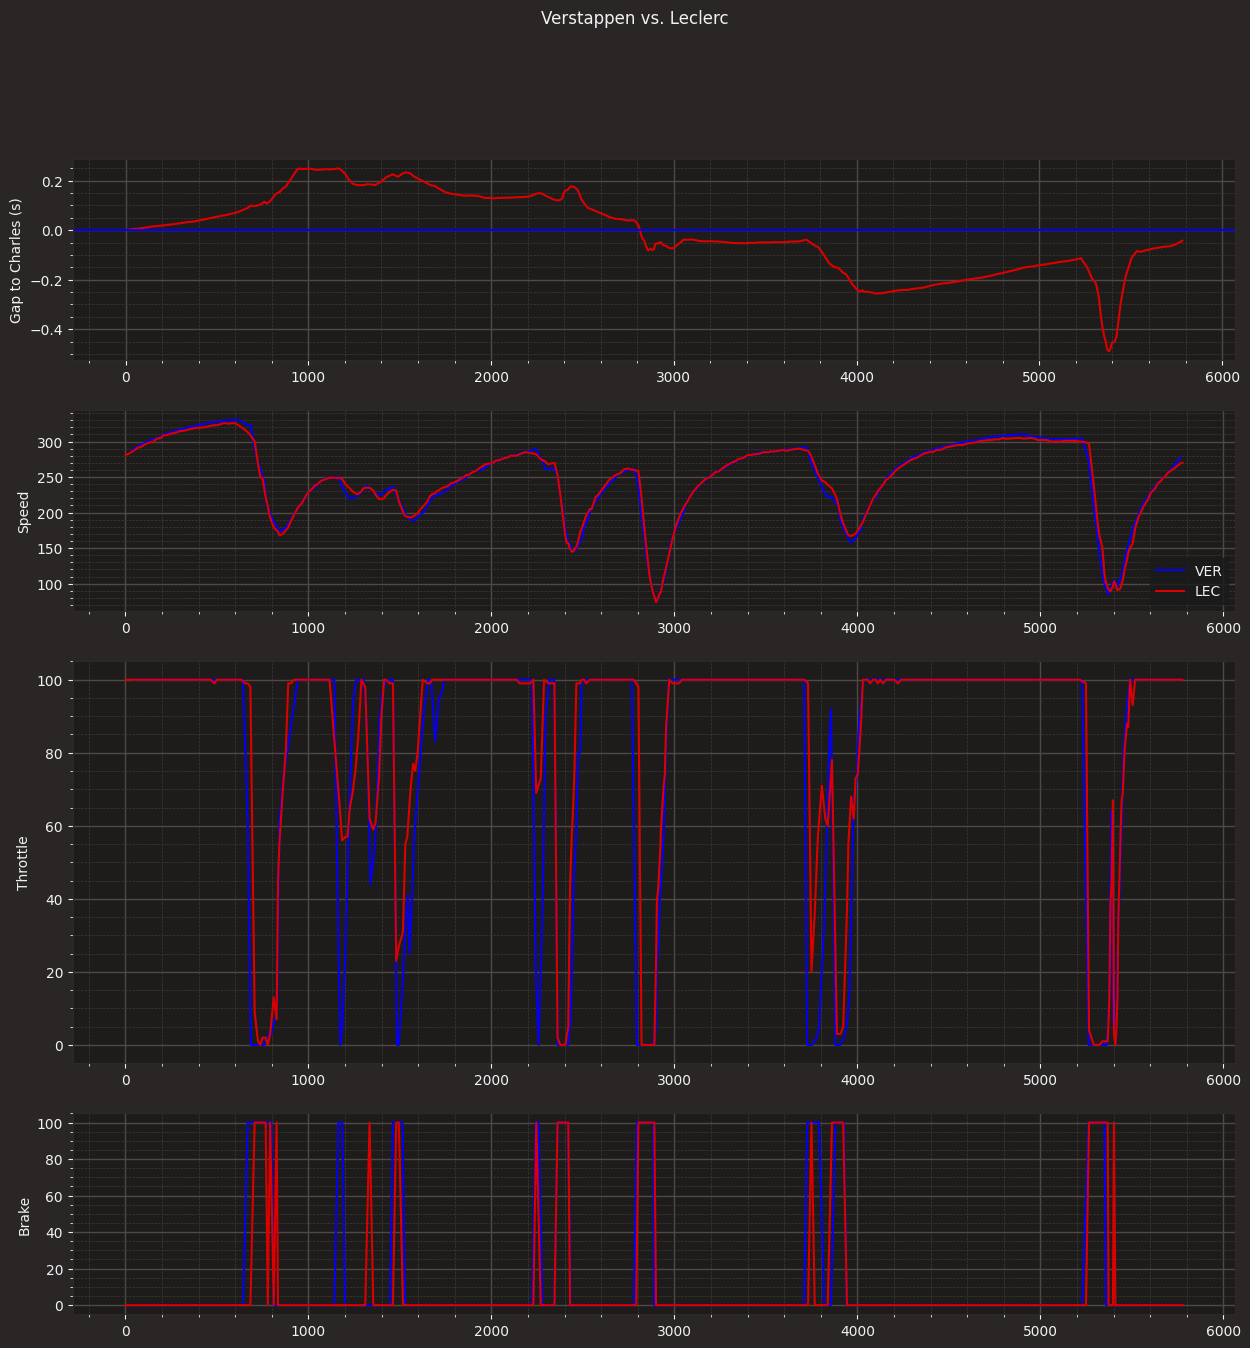

In [86]:
plot_size = [15, 15]
plot_ratios = [1, 1, 2, 1]

plt.rcParams['figure.figsize'] = plot_size

fig, ax = plt.subplots(4, gridspec_kw={'height_ratios': plot_ratios})
fig.suptitle("Verstappen vs. Leclerc")

ax[0].plot(ref_tel['Distance'], delta_time, color=plotting.team_color(fastest_lec['Team']))
ax[0].axhline(0, color=plotting.team_color(fastest_ver['Team']))
ax[0].set(ylabel=f"Gap to Charles (s)")

ax[1].plot(telemetry_ver['Distance'], telemetry_ver['Speed'], label='VER', color=plotting.team_color(fastest_ver['Team']))
ax[1].plot(telemetry_lec['Distance'], telemetry_lec['Speed'], label='LEC', color=plotting.team_color(fastest_lec['Team']))
ax[1].set(ylabel='Speed')
ax[1].legend(loc="lower right")

ax[2].plot(telemetry_ver['Distance'], telemetry_ver['Throttle'], label='VER', color=plotting.team_color(fastest_ver['Team']))
ax[2].plot(telemetry_lec['Distance'], telemetry_lec['Throttle'], label='LEC', color=plotting.team_color(fastest_lec['Team']))
ax[2].set(ylabel='Throttle')

ax[3].plot(telemetry_ver['Distance'], telemetry_ver['Brake'], label='VER', color=plotting.team_color(fastest_ver['Team']))
ax[3].plot(telemetry_lec['Distance'], telemetry_lec['Brake'], label='LEC', color=plotting.team_color(fastest_lec['Team']))
ax[3].set(ylabel='Brake')

plt.show()

From this telemetry, we supposedly able to infer each car's strength. However honestly, it's not as simple as I initially thought it would be!

Throughout Sector 1 (0 to 2100), Charles have higher throttle (in other words, lifted the gas less) relative to Max. However looking at the speed, Ferrari aren't that much faster through corners. Indeed, Max's top speed on the straights granted him some advantage and he did have the fastest Sector 1 of anybody.

In [115]:
ver_s1 = telemetry_ver.loc[telemetry_ver['Distance'] <= 2100]
lec_s1 = telemetry_lec.loc[telemetry_lec['Distance'] <= 2100]

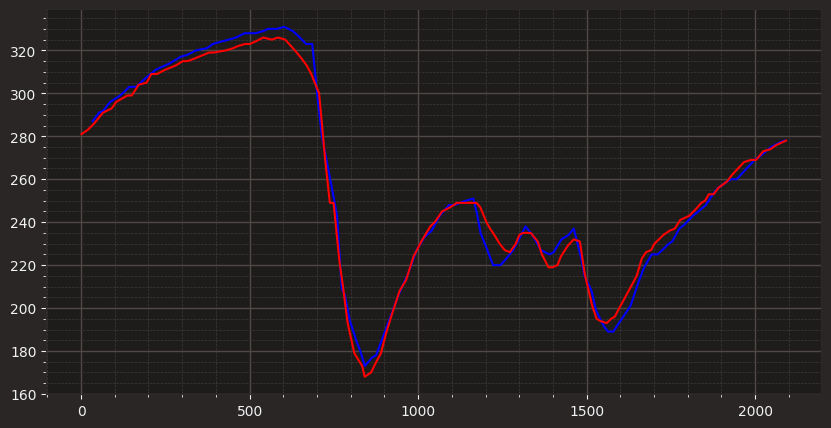

In [116]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(ver_s1['Distance'], ver_s1['Speed'], color='Blue')
ax.plot(lec_s1['Distance'], lec_s1['Speed'], color='Red')

### To be continued.

TODO:
- [ ] Add line collections aka circuit map. Plot according to fastest minisectors.
- [ ] Find a way to mark the sectors. (What's the distance?)